In [36]:
import pandas as pd
import numpy as np
import DataPreprocessingLibrary as dpl
import string
# https://pypi.org/project/COVID19Py/

pd.set_option('display.max_colwidth', -1)


API_COLUMNS = ["Title", "Description", "NewsURL", "PublishedTime", "SourceName" , "SourceURL"]
# api_content = pd.read_csv("../Data/NewsContentClean.csv")
api_content = pd.read_csv("../Data/NewsContent.csv", index_col=[0])

In [37]:
from textblob import TextBlob
import nltk
from textblob import Word
from textblob.wordnet import VERB

In [38]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [39]:
temp1 = api_content.iloc[-2].Title
print("Showing the results of the original : \n" + str(temp1) + "\n================================================\n")
print("Showing the results of the preprocessed : \n" + str(dpl.preprocess(temp1) + "\n================================================\n"))

Showing the results of the original : 
US government slow to act as anti-vaxxers spread lies on social media about coronavirus vaccine

Showing the results of the preprocessed : 
us government slow to act as anti vaxxers spread lies on social media about virus vaccine



In [40]:
api_content["Title"] = api_content['Title'].apply(dpl.preprocess)
api_content["Description"] = api_content['Description'].apply(dpl.preprocess)

# api_content = api_content.drop(["Title","Description"] , axis = 1) 
# api_content.to_csv("../Data/NewsContentPreprocessed.csv", index= False)

In [41]:
sentiment_value = []
sentiment_value_description = []

sentiment_value_nltk = []
sentiment_value_description_nltk = []

for title in api_content.Title.values:
    sentiment_value.append(  TextBlob( title ).sentiment.polarity  )
    sentiment_value_nltk.append(analyzer.polarity_scores(title)["compound"])
    
for description in api_content.Description.values:
    sentiment_value_description.append(  TextBlob( description ).sentiment.polarity  )
    sentiment_value_description_nltk.append(analyzer.polarity_scores(description)["compound"])
    

In [42]:
api_content["SentimentValueTitle"] = sentiment_value
api_content["SentimentValueDescription"] = sentiment_value_description

api_content["SentimentValueTitleVader"] = sentiment_value_nltk
api_content["SentimentValueDescriptionVader"] = sentiment_value_description_nltk



In [43]:
### General Sentiment value for the title is 0.03, pretty average but still more positive
### General Sentiment value for the description is 0.07, pretty average but still more positive

In [44]:
api_content['SentimentValueTitle'].describe()

count    1657.000000
mean     0.034584   
std      0.212460   
min     -1.000000   
25%      0.000000   
50%      0.000000   
75%      0.125000   
max      1.000000   
Name: SentimentValueTitle, dtype: float64

In [45]:
api_content['SentimentValueDescription'].describe()

count    1657.000000
mean     0.076411   
std      0.200356   
min     -1.000000   
25%      0.000000   
50%      0.039773   
75%      0.183333   
max      1.000000   
Name: SentimentValueDescription, dtype: float64

In [46]:
api_content['SentimentValueTitleVader'].describe()

count    1657.000000
mean    -0.105058   
std      0.371798   
min     -0.911800   
25%     -0.401900   
50%      0.000000   
75%      0.000000   
max      0.812600   
Name: SentimentValueTitleVader, dtype: float64

In [47]:
api_content['SentimentValueDescriptionVader'].describe()


count    1657.000000
mean    -0.005805   
std      0.461476   
min     -0.957800   
25%     -0.381800   
50%      0.000000   
75%      0.381800   
max      0.967400   
Name: SentimentValueDescriptionVader, dtype: float64

In [48]:
sentiment_values_df = api_content.copy()
sentiment_values_df_grouped = sentiment_values_df.groupby("PublishedTime").mean()

In [49]:
api_content.to_csv("../Data/NewsContentPreprocessed.csv")
sentiment_values_df_grouped.to_csv("../Data/SentimentValues.csv")

In [50]:
pd.set_option('display.max_colwidth', 30)

api_content

,Title,Description,NewsURL,PublishedTime,SourceName,SourceURL,SentimentValueTitle,SentimentValueDescription,SentimentValueTitleVader,SentimentValueDescriptionVader
0,white house doesn rule out...,the white house is not rul...,https://abcnews.go.com/Pol...,2020-01-29,ABC,https://abcnews.go.com,0.000000,0.258333,-0.4215,0.0000
1,virus crisis in china to h...,china controls almost ...,https://dfw.cbslocal.com/2...,2020-01-29,CBS Boston / WBZ,https://dfw.cbslocal.com,0.100000,0.300000,-0.6249,0.4215
2,virus cases in us should n...,a deadly virus that killed...,https://www.foxnews.com/he...,2020-01-29,Fox News,https://www.foxnews.com,0.500000,-0.040000,-0.3972,-0.8225
3,us learned from ebola but ...,the department of homelan...,https://www.usatoday.com/s...,2020-01-29,USA Today,https://www.usatoday.com,0.100000,0.000000,-0.2498,0.5859
4,virus japan and us fly ci...,japan and us airlift hundr...,https://www.theguardian.co...,2020-01-29,The Guardian,https://www.theguardian.com,0.800000,0.400000,-0.5994,-0.5994
...,...,...,...,...,...,...,...,...,...,...
1651,virus texas becomes us st...,uk economy falls into its ...,https://www.ft.com/content...,2020-08-12,The Financial Times,https://www.ft.com,0.000000,-0.333333,-0.5994,-0.8979
1652,what you need to know abou...,nationally over the last ...,https://www.wesh.com/artic...,2020-08-12,WESH,https://www.wesh.com,0.200000,-0.004798,0.2263,0.0000
1653,virus live updates seattl...,worries over measles flu ...,https://www.usatoday.com/s...,2020-08-12,USA Today,https://www.usatoday.com,0.136364,0.500000,0.0000,-0.7184
1654,us government slow to act ...,while anti vaxxers flood s...,https://www.msn.com/en-us/...,2020-08-12,CNN on MSN.com,https://www.msn.com,-0.133333,-0.008333,-0.6249,-0.6249


In [51]:
sentiment_values_df_grouped

,SentimentValueTitle,SentimentValueDescription,SentimentValueTitleVader,SentimentValueDescriptionVader
PublishedTime,,,,
2020-01-29,0.255208,0.153056,-0.438800,-0.069083
2020-01-30,0.022386,0.040869,0.058820,-0.249390
2020-01-31,-0.093182,0.007828,-0.218489,-0.199178
2020-02-01,0.067340,0.135278,-0.117200,0.247789
2020-02-02,0.000000,0.129167,-0.363450,-0.707050
...,...,...,...,...
2020-08-08,-0.063788,-0.001423,-0.135520,-0.282620
2020-08-09,0.079261,0.099226,0.086975,0.050700
2020-08-10,0.325000,0.066414,-0.094050,-0.415917


In [52]:
# temp  = pd.read_csv("../Data/SentimentValues.csv", index_col=[0])
# temp  = pd.read_csv("../Data/NewsContentPreprocessed.csv", index_col=[0])
# # temp

In [53]:
showcase = pd.read_csv("../Data/NewsContent.csv", index_col=[0])
showcase["CleanTitle"] = showcase['Title'].apply(dpl.preprocess) 
showcase["CleanDescription"] = showcase['Description'].apply(dpl.preprocess) 
showcase = showcase.drop(["NewsURL" , "SourceName", "SourceURL"], axis = 1)
showcase

,Title,Description,PublishedTime,CleanTitle,CleanDescription
0,White House doesn't rule o...,The White House is not rul...,2020-01-29,white house doesn rule out...,the white house is not rul...
1,Coronavirus Crisis In Chin...,“China controls almost 100...,2020-01-29,virus crisis in china to h...,china controls almost ...
2,Coronavirus cases in US sh...,A deadly coronavirus that'...,2020-01-29,virus cases in us should n...,a deadly virus that killed...
3,US learned from Ebola but ...,“The Department of Homelan...,2020-01-29,us learned from ebola but ...,the department of homelan...
4,Coronavirus: Japan and US ...,Japan and US airlift hundr...,2020-01-29,virus japan and us fly ci...,japan and us airlift hundr...
...,...,...,...,...,...
1651,Coronavirus: Texas becomes...,UK economy falls into its ...,2020-08-12,virus texas becomes us st...,uk economy falls into its ...
1652,What you need to know abou...,"Nationally, over the last ...",2020-08-12,what you need to know abou...,nationally over the last ...
1653,Coronavirus live updates: ...,"Worries over measles, flu ...",2020-08-12,virus live updates seattl...,worries over measles flu ...
1654,US government slow to act ...,While anti-vaxxers flood s...,2020-08-12,us government slow to act ...,while anti vaxxers flood s...


In [54]:
temp = showcase.copy()
temp = temp.drop(["PublishedTime", "Description"], axis =1 )

In [55]:
pd.set_option('display.max_colwidth', -1)
temp.iloc[-5]

Title               Coronavirus: Texas becomes US state with fourth-highest death toll – as it happened                                                                                                       
CleanTitle          virus  texas becomes us state with fourth highest death toll   as it happened                                                                                                             
CleanDescription    uk economy falls into its deepest recession on record following lockdown  asos and admiral sail through worst of the crisis  the german health minister is sceptical about russia vaccine 
Name: 1651, dtype: object

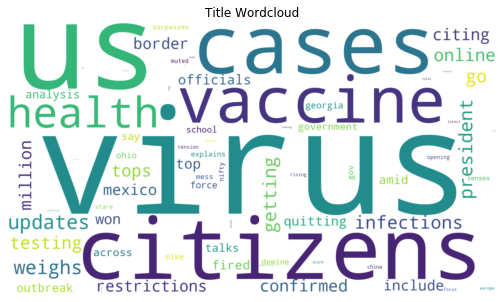

In [56]:
dpl.make_word_cloud(showcase[-30:] , "CleanTitle", "Title Wordcloud")


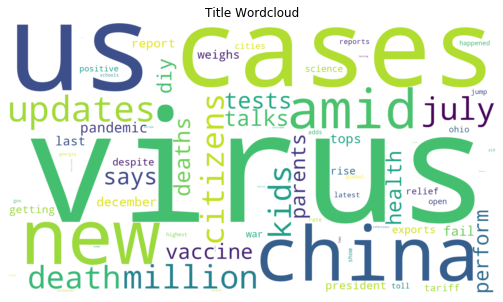

In [57]:
dpl.make_word_cloud(showcase[-60:] , "CleanTitle", "Title Wordcloud")


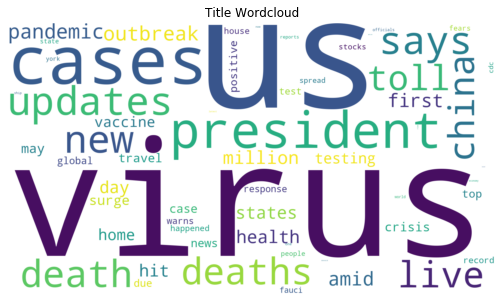

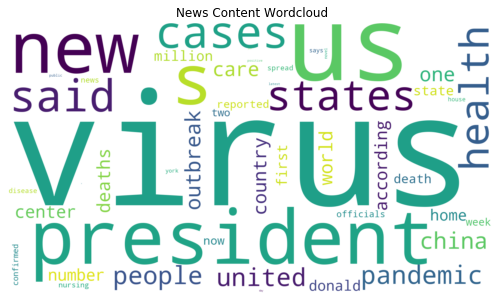

In [38]:

dpl.make_word_cloud(showcase , "CleanTitle", "Title Wordcloud")
dpl.make_word_cloud(showcase, "CleanDescription", "News Content Wordcloud")